In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Customer Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
#replacing blanks with 0 in TotalChargers due to tenure is zero
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
#Coverting it to float datatype
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [9]:
#checking duplicates entirely
df.duplicated().sum()

np.int64(0)

In [10]:
#checking duplicates on a column based
df["customerID"].duplicated().sum()

np.int64(0)

In [11]:
#Converted 0 and 1 to Yes or No in the "SeniorCitizen" column and made a new column as "seniorcitizen" to understand easily
def con(value):
    if value==1:
        return "Yes"
    else:
        return "No"    
    
df["seniorcitizen"]=df["SeniorCitizen"].apply(con)

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,seniorcitizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,No,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,No
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,No


[Text(0, 0, '5174'), Text(0, 0, '1869')]

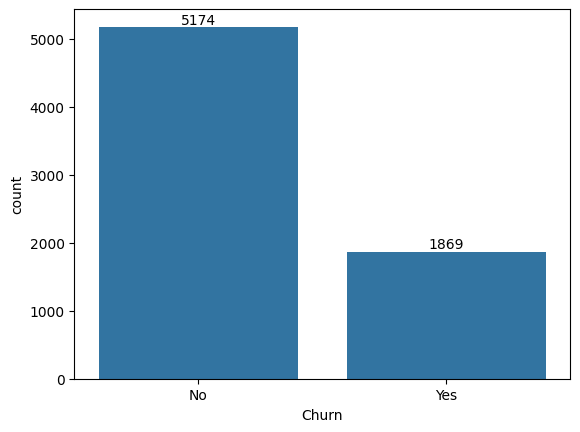

In [13]:
ax=sns.countplot(x="Churn", data=df) #plotting the bar chart
ax.bar_label(ax.containers[0]) #showing count labels

In [14]:
gb=df.groupby("Churn").agg({"Churn":"count"}) #Groupby on column Churn
gb


,Churn
Churn,
No,5174
Yes,1869


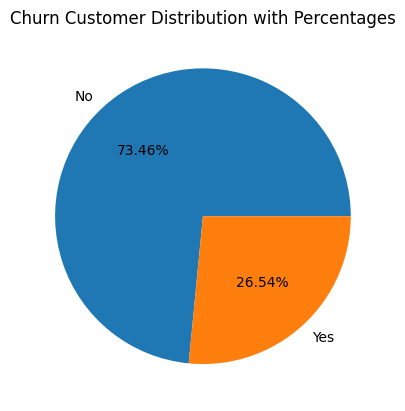

In [15]:
plt.pie(gb['Churn'], labels=gb.index, autopct="%1.2f%%") #piechart showing the above bg table with autopercentage
plt.title("Churn Customer Distribution with Percentages")
plt.show()

In [16]:
ow=round(df['Churn'].value_counts(normalize=True)*100,2) #another way of finding percentage table, other than groupby

print(ow)

Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


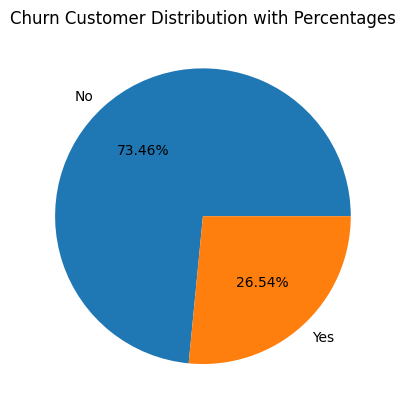

In [17]:
plt.pie(ow, labels=ow.index, autopct="%1.2f%%")
plt.title("Churn Customer Distribution with Percentages")
plt.show()

from the above we can conclude that 26.54% customers have been churned out and 73.46% of customers haven't churned.

In [18]:
#plotting bar with ow


# Assuming 'df["Churn"].value_counts()' gives the count of "Yes" and "No" for churn
churn_counts = df["Churn"].value_counts()
churn_counts



Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [19]:
total = churn_counts.sum()  # Total count to calculate percentages
total

np.int64(7043)

In [20]:
percentages = (churn_counts / total) * 100  # Calculate percentages

percentages

Churn
No     73.463013
Yes    26.536987
Name: count, dtype: float64

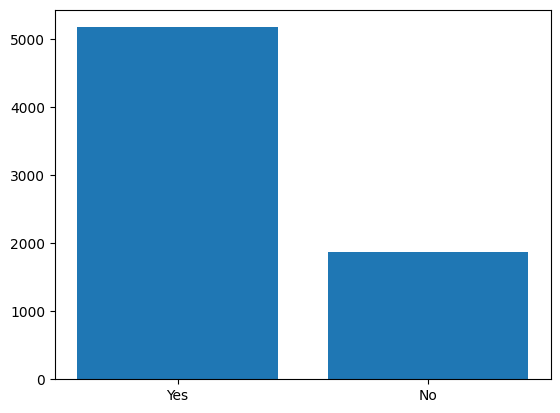

In [21]:
# Create bar plot
owbar = plt.bar(["Yes", "No"], churn_counts)



C:\Users\ovez3\AppData\Local\Temp\ipykernel_5612\2106085383.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i, count + 10, f'{percentages[i]:.2f}%', ha='center', color='k', fontweight='bold')


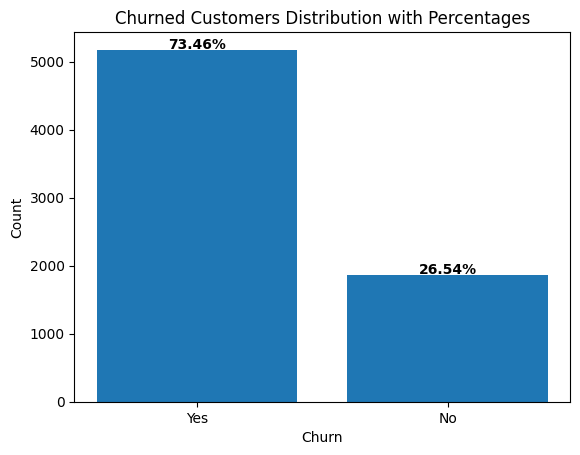

In [22]:


# Assuming 'df["Churn"].value_counts()' gives the count of "Yes" and "No" for churn
churn_counts = df["Churn"].value_counts()
total = churn_counts.sum()  # Total count to calculate percentages
percentages = (churn_counts / total) * 100  # Calculate percentages

# Create bar plot
owbar = plt.bar(["Yes", "No"], churn_counts)

# Add percentage labels on top of each bar
for i, count in enumerate(churn_counts):
    plt.text(i, count + 10, f'{percentages[i]:.2f}%', ha='center', color='k', fontweight='bold')

# Set labels and title
plt.xlabel("Churn")
plt.ylabel("Count")
plt.title("Churned Customers Distribution with Percentages")

plt.show()


Churn
No     73.46
Yes    26.54
Name: proportion, dtype: float64


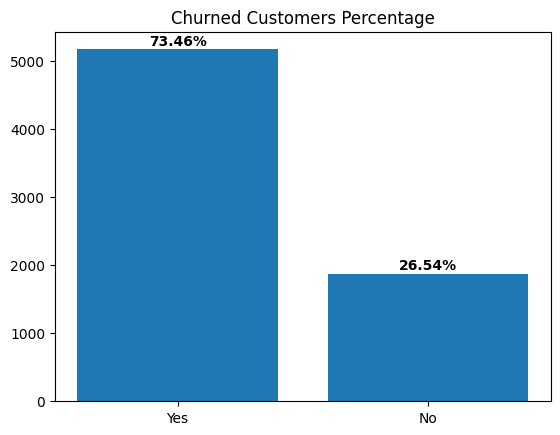

In [23]:
#another way of plotting bar percentage graph
ow=round(df['Churn'].value_counts(normalize=True)*100,2) #another way of finding percentage table, other than groupby
print(ow)

#plt.figure(figsize=(7,7))
plt.title("Churned Customers Percentage")
bars=plt.bar(["Yes","No"], df["Churn"].value_counts())

# Add percentage labels on top of each bar using plt.bar_label
# `labels` argument is a list of formatted strings for each bar
plt.bar_label(bars, labels=[f'{p}%' for p in ow], label_type='edge', padding=1, color='black', fontweight='bold')
plt.show()

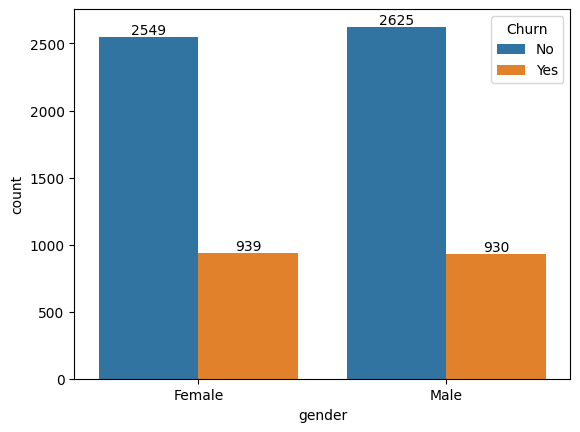

In [24]:
sns.countplot(x="gender", data=df , hue="Churn")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()


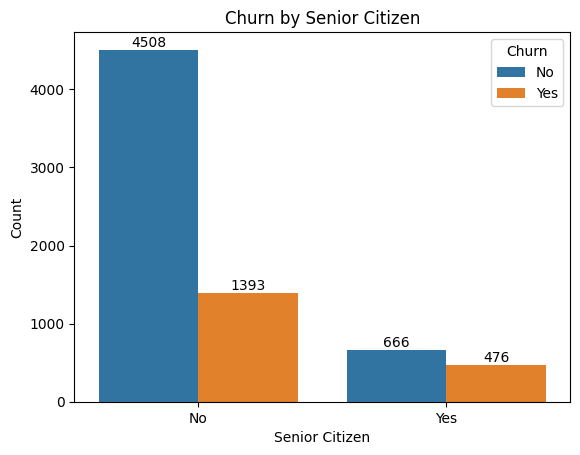

In [25]:
sns.countplot(x="seniorcitizen", data=df , hue="Churn")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.xlabel("Senior Citizen")
plt.ylabel("Count")
plt.title("Churn by Senior Citizen")
plt.show()


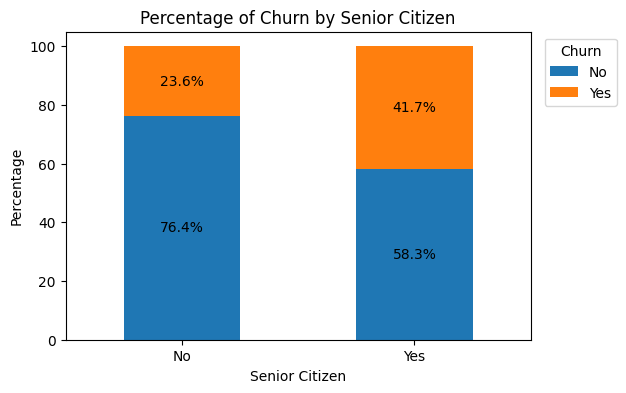

In [114]:
# Calculate the percentage counts
data = df.groupby(["seniorcitizen", "Churn"]).size().unstack()
percentage_data = data.apply(lambda x: x / x.sum() * 100, axis=1)

# Plot the stacked bar chart

percentage_data.plot(kind="bar", stacked=True,figsize=(6, 4), width=0.5)

# Add percentage labels on each bar
for i, container in enumerate(plt.gca().containers):
    plt.bar_label(container, fmt='%.1f%%', label_type="center" )

plt.title("Percentage of Churn by Senior Citizen")
plt.xlabel("Senior Citizen")
plt.xticks(rotation=0)
plt.ylabel("Percentage")
plt.legend(title="Churn",loc="upper right", bbox_to_anchor=(1.2,1))
plt.show()

<Axes: xlabel='tenure', ylabel='Count'>

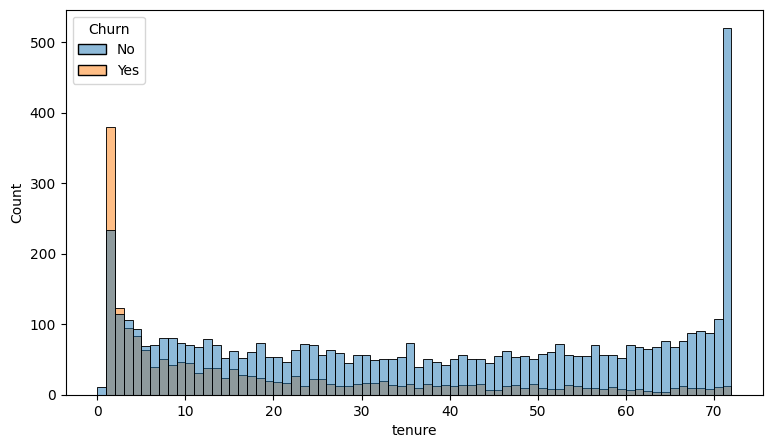

In [92]:
plt.figure(figsize=(9,5))
sns.histplot(x="tenure",data=df, bins=72, hue="Churn")

People who used our services stayed for a long time and the people who have joined early they churned early. let's find the reason now

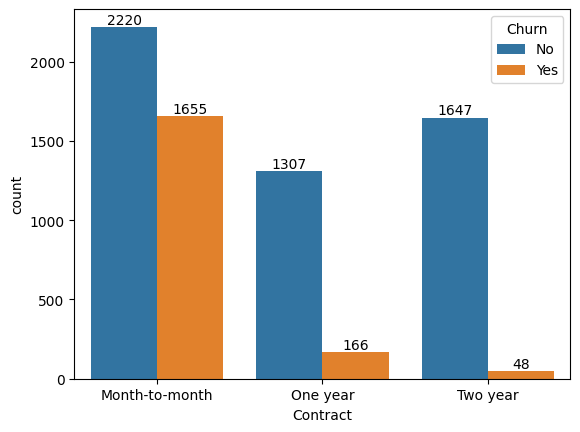

In [94]:
sns.countplot(x="Contract", data=df , hue="Churn")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()


The above shows that the people with longer contract have stayed for longer duration and vice versa. The churning of customers can be reduced by attracting people with long duration contract with more offers.

In [100]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'seniorcitizen'],
      dtype='object')

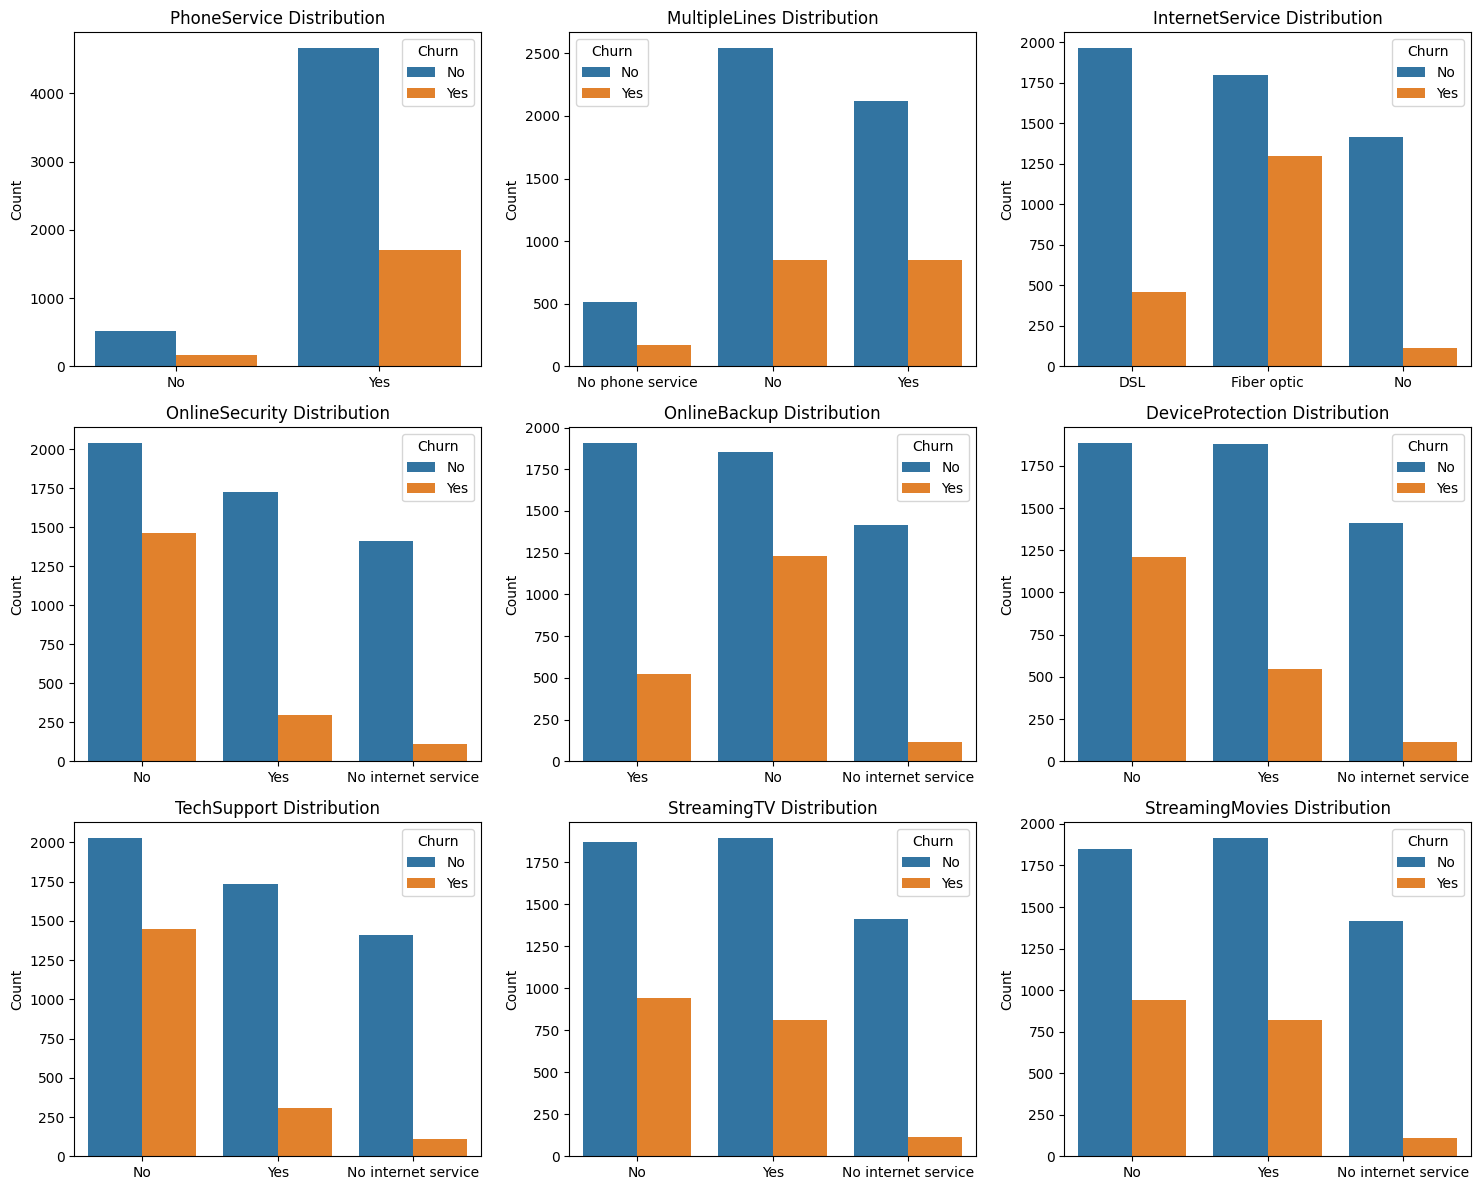

In [106]:
service_columns = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies']
# Create subplots
fig, axes = plt.subplots(3, 3, figsize=(15, 12))  # 3x3 grid layout

# Loop through each column and plot
for i, col in enumerate(service_columns):
    sns.countplot(data=df, x=col, ax=axes[i // 3, i % 3], hue="Churn")
    axes[i // 3, i % 3].set_title(f'{col} Distribution')
    axes[i // 3, i % 3].set_xlabel('')
    axes[i // 3, i % 3].set_ylabel('Count')

# Adjust layout for better readability
plt.tight_layout()
plt.show()

This image contains a series of count plots, each showing the distribution of customers who churned (Yes) and those who did not (No) across various service categories. Here’s a summary of each plot:

PhoneService: The majority of customers have phone service. Among those with phone service, churn is higher than those without, but overall, non-churners dominate.

MultipleLines: Most customers either do not have multiple lines or do not have phone service. Customers with multiple lines have a higher churn rate than those without.

InternetService: Fiber optic internet service has the highest churn rate compared to DSL and no internet service. DSL customers have lower churn, while customers without internet service have minimal churn.

OnlineSecurity: The absence of online security shows a higher churn rate, whereas customers with online security tend to churn less.

OnlineBackup: Similar to online security, customers without online backup have a higher churn rate compared to those who have it.

DeviceProtection: Customers without device protection show a higher rate of churn compared to those with device protection.

TechSupport: Customers who do not have tech support show a significantly higher churn rate than those who do, suggesting that tech support may help retain customers.

StreamingTV: Customers who have streaming TV show a higher churn rate than those who don’t, with a similar pattern observed across the other services.

StreamingMovies: Similar to streaming TV, customers with streaming movie services have a higher churn rate than those without.

Overall Summary:
Customers with additional internet-based services (e.g., streaming, tech support, device protection) generally show a higher churn rate, especially those with fiber optic internet and those lacking online security or tech support. Providing additional support services, like tech support and online security, may help reduce churn.

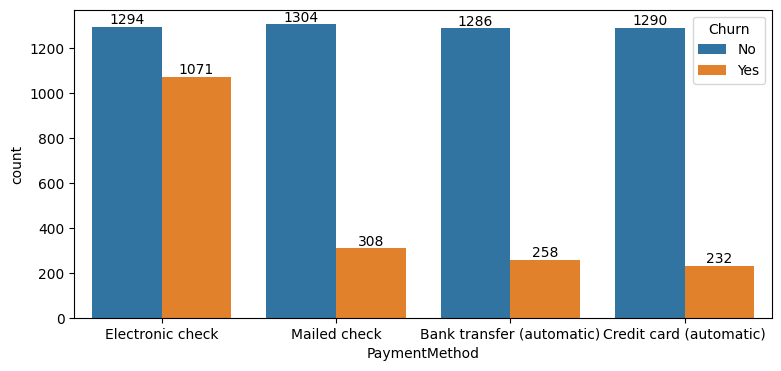

In [ ]:
#One way of plotting this

plt.figure(figsize=(9,4))
sns.countplot(x="PaymentMethod", data=df , hue="Churn")
for container in plt.gca().containers:
    plt.bar_label(container)
plt.show()


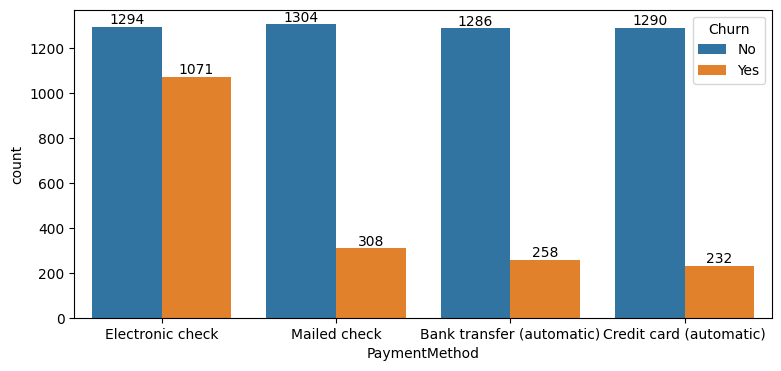

In [111]:
#Another way without using forloop
plt.figure(figsize=(9,4))
pm=sns.countplot(x="PaymentMethod", data=df , hue="Churn")
pm.bar_label(pm.containers[0])
pm.bar_label(pm.containers[1])
plt.show()


Customers with automatic payment through Bank transfer or Credit card are less likely to churn than people who are paying through Electronic check and Mailed check